In [1]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle (2).json


{'kaggle.json': b'{"username":"alphinjain","key":"41fe6d701d56536ba71693189cd26cf0"}'}

In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle
!chmod 600 ~/.kaggle/kaggle.json

In [3]:
!kaggle competitions download -c new-york-city-taxi-fare-prediction

train.csv.zip: Skipping, found more recently modified local copy (use --force to force download)
test.csv: Skipping, found more recently modified local copy (use --force to force download)
sample_submission.csv: Skipping, found more recently modified local copy (use --force to force download)
GCP-Coupons-Instructions.rtf: Skipping, found more recently modified local copy (use --force to force download)


In [4]:
from zipfile import ZipFile
file_name ="/content/train.csv.zip"

with ZipFile(file_name,'r') as zip:
  zip.extractall()
  print('Don')

Don


In [5]:
# from zipfile import ZipFile
# file_name ="/content/test.zip"

# with ZipFile(file_name,'r') as zip:
#   zip.extractall()
#   print('Don')

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [28]:
df2=pd.read_csv('/content/train.csv',nrows=100000)
df2

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1
...,...,...,...,...,...,...,...,...
99995,2013-09-24 07:39:00.00000071,9.0,2013-09-24 07:39:00 UTC,-73.947977,40.784792,-73.964262,40.792347,5
99996,2014-05-15 12:15:45.0000001,6.0,2014-05-15 12:15:45 UTC,-73.962918,40.799107,-73.974178,40.786487,1
99997,2015-02-19 17:40:43.0000001,5.0,2015-02-19 17:40:43 UTC,-73.996773,40.723549,-73.991974,40.724724,1
99998,2009-10-10 23:35:00.000000165,6.9,2009-10-10 23:35:00 UTC,-73.983652,40.756667,-73.982715,40.767067,4


In [29]:
df2=df2.reset_index()

In [30]:
df2.columns
df2.dropna(inplace=True)

# FEATURE ENGINNERING

In [31]:
import datetime 
df2['pickup_datetime']=pd.to_datetime(df2['pickup_datetime'])-datetime.timedelta(hours=4)

In [32]:
df2

,index,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 13:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1
1,1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 12:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1
2,2,2011-08-18 00:35:00.00000049,5.7,2011-08-17 20:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2
3,3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 00:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1
4,4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 03:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1
...,...,...,...,...,...,...,...,...,...
99995,99995,2013-09-24 07:39:00.00000071,9.0,2013-09-24 03:39:00+00:00,-73.947977,40.784792,-73.964262,40.792347,5
99996,99996,2014-05-15 12:15:45.0000001,6.0,2014-05-15 08:15:45+00:00,-73.962918,40.799107,-73.974178,40.786487,1
99997,99997,2015-02-19 17:40:43.0000001,5.0,2015-02-19 13:40:43+00:00,-73.996773,40.723549,-73.991974,40.724724,1
99998,99998,2009-10-10 23:35:00.000000165,6.9,2009-10-10 19:35:00+00:00,-73.983652,40.756667,-73.982715,40.767067,4


In [33]:
df2['Year']=df2['pickup_datetime'].dt.year
df2['Month']=df2['pickup_datetime'].dt.month
df2['Day']=df2['pickup_datetime'].dt.day
df2['Hour']=df2['pickup_datetime'].dt.hour
df2['Minutes']=df2['pickup_datetime'].dt.minute

In [34]:
df2

,index,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,Year,Month,Day,Hour,Minutes
0,0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 13:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1,2009,6,15,13,26
1,1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 12:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1,2010,1,5,12,52
2,2,2011-08-18 00:35:00.00000049,5.7,2011-08-17 20:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2,2011,8,17,20,35
3,3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 00:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1,2012,4,21,0,30
4,4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 03:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1,2010,3,9,3,51
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,99995,2013-09-24 07:39:00.00000071,9.0,2013-09-24 03:39:00+00:00,-73.947977,40.784792,-73.964262,40.792347,5,2013,9,24,3,39
99996,99996,2014-05-15 12:15:45.0000001,6.0,2014-05-15 08:15:45+00:00,-73.962918,40.799107,-73.974178,40.786487,1,2014,5,15,8,15
99997,99997,2015-02-19 17:40:43.0000001,5.0,2015-02-19 13:40:43+00:00,-73.996773,40.723549,-73.991974,40.724724,1,2015,2,19,13,40
99998,99998,2009-10-10 23:35:00.000000165,6.9,2009-10-10 19:35:00+00:00,-73.983652,40.756667,-73.982715,40.767067,4,2009,10,10,19,35


In [35]:
df2['morn_night']=np.where(df2['Hour']<12,0,1)

In [36]:
df2.drop('pickup_datetime',axis=1,inplace=True)

# Longitude And Latitude

In [37]:
###https://stackoverflow.com/questions/4913349/haversine-formula-in-python-bearing-and-distance-between-two-gps-points


def haversine(df):
    """
    Calculate the great circle distance between two points 
    on the earth (specified in decimal degrees)
    """
    lat1= np.radians(df["pickup_latitude"])
    lat2 = np.radians(df["dropoff_latitude"])
    #### Based on the formula  x1=drop_lat,x2=dropoff_long 
    dlat = np.radians(df['dropoff_latitude']-df["pickup_latitude"])
    dlong = np.radians(df["dropoff_longitude"]-df["pickup_longitude"])
    a = np.sin(dlat/2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlong/2)**2

    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1-a))
    r = 6371 # Radius of earth in kilometers. Use 3956 for miles
    return c * r

In [38]:
df2['Total_Distance']=haversine(df2)

In [39]:
df2

,index,key,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,Year,Month,Day,Hour,Minutes,morn_night,Total_Distance
0,0,2009-06-15 17:26:21.0000001,4.5,-73.844311,40.721319,-73.841610,40.712278,1,2009,6,15,13,26,1,1.030764
1,1,2010-01-05 16:52:16.0000002,16.9,-74.016048,40.711303,-73.979268,40.782004,1,2010,1,5,12,52,1,8.450134
2,2,2011-08-18 00:35:00.00000049,5.7,-73.982738,40.761270,-73.991242,40.750562,2,2011,8,17,20,35,1,1.389525
3,3,2012-04-21 04:30:42.0000001,7.7,-73.987130,40.733143,-73.991567,40.758092,1,2012,4,21,0,30,0,2.799270
4,4,2010-03-09 07:51:00.000000135,5.3,-73.968095,40.768008,-73.956655,40.783762,1,2010,3,9,3,51,0,1.999157
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,99995,2013-09-24 07:39:00.00000071,9.0,-73.947977,40.784792,-73.964262,40.792347,5,2013,9,24,3,39,0,1.607917
99996,99996,2014-05-15 12:15:45.0000001,6.0,-73.962918,40.799107,-73.974178,40.786487,1,2014,5,15,8,15,0,1.693432
99997,99997,2015-02-19 17:40:43.0000001,5.0,-73.996773,40.723549,-73.991974,40.724724,1,2015,2,19,13,40,1,0.424983
99998,99998,2009-10-10 23:35:00.000000165,6.9,-73.983652,40.756667,-73.982715,40.767067,4,2009,10,10,19,35,1,1.159117


In [40]:
df2.drop(['pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude'],axis=1,inplace=True)

In [41]:
df2.drop('index',axis=1,inplace=True)
df2

,key,fare_amount,passenger_count,Year,Month,Day,Hour,Minutes,morn_night,Total_Distance
0,2009-06-15 17:26:21.0000001,4.5,1,2009,6,15,13,26,1,1.030764
1,2010-01-05 16:52:16.0000002,16.9,1,2010,1,5,12,52,1,8.450134
2,2011-08-18 00:35:00.00000049,5.7,2,2011,8,17,20,35,1,1.389525
3,2012-04-21 04:30:42.0000001,7.7,1,2012,4,21,0,30,0,2.799270
4,2010-03-09 07:51:00.000000135,5.3,1,2010,3,9,3,51,0,1.999157
...,...,...,...,...,...,...,...,...,...,...
99995,2013-09-24 07:39:00.00000071,9.0,5,2013,9,24,3,39,0,1.607917
99996,2014-05-15 12:15:45.0000001,6.0,1,2014,5,15,8,15,0,1.693432
99997,2015-02-19 17:40:43.0000001,5.0,1,2015,2,19,13,40,1,0.424983
99998,2009-10-10 23:35:00.000000165,6.9,4,2009,10,10,19,35,1,1.159117


In [42]:
df2.drop(['key'],axis=1,inplace=True)

In [43]:
df2.isna().sum()

fare_amount        0
passenger_count    0
Year               0
Month              0
Day                0
Hour               0
Minutes            0
morn_night         0
Total_Distance     0
dtype: int64

In [44]:
df2.to_csv('clean_file.csv')

In [45]:
##Regression
X=df2.drop('fare_amount',axis=1)
y=df2['fare_amount'] 

In [46]:
from sklearn.ensemble import ExtraTreesRegressor
feature_selection=ExtraTreesRegressor()
feature_selection.fit(X,y)

ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=None, oob_score=False,
                    random_state=None, verbose=0, warm_start=False)

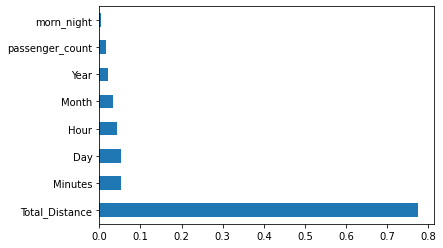

In [47]:
feat_imp=pd.Series(feature_selection.feature_importances_,index=X.columns)
feat_imp.nlargest(10).plot(kind='barh')

In [48]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.3,random_state=100)

In [50]:
from xgboost import XGBRegressor
regressor = XGBRegressor(n_estimators=200)
regressor.fit(X_train,y_train)

[10:04:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=200,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [51]:
y_pred= regressor.predict(X_test)
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.735218565913337

In [ ]:
#Randomized Search CV
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBRegressor
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]

# Various learning rate parameters
learning_rate=['0.05','0.1','0.2','0.3']

#Maximum number of levels in tree
max_depth=[int(i) for i in np.linspace(5,30,num=6)]

## max_depth.append(None)
#Subssample parameter values
subsample=[0.7,0.6,0.8]

## Minimum child weight parameters
min_child_weight=[3,4,5,6,7]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'learning_rate': learning_rate,
               'max_depth': max_depth}

print(random_grid)
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations
xg_random = RandomizedSearchCV(estimator = XGBRegressor(),
                               param_distributions = random_grid,
                               scoring='neg_mean_squared_error', 
                               n_iter = 10,
                               cv = 5, 
                               verbose=-1,
                               random_state=42,
                               n_jobs = -1)
xg_random.fit(X,y)
xg_random.best_score_

In [ ]:
sns.displot(y_test-y_pred)

In [ ]:
plt.scatter(y_test,y_pred)

In [ ]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

In [55]:
from sklearn.ensemble import RandomForestRegressor
random_forest=RandomForestRegressor()
random_forest.fit(X_train,y_train)
y_pred= random_forest.predict(X_test)
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.7169223746042708

In [56]:
!pip install tpot

     |████████████████████████████████| 92kB 6.5MB/s 
     |████████████████████████████████| 163kB 14.7MB/s 
  Created wheel for stopit: filename=stopit-1.1.2-cp36-none-any.whl size=11956 sha256=7c24390fbe9117c7040414e503c184f48cdae0b008393027ca958cc12b1cb9d1
  Stored in directory: /root/.cache/pip/wheels/3c/85/2b/2580190404636bfc63e8de3dff629c03bb795021e1983a6cc7
Successfully built stopit


In [57]:
from tpot import TPOTRegressor

In [58]:
tpot=TPOTRegressor(generations=1,offspring_size=2,verbosity=2,random_state=42)
tpot.fit(X_train,y_train)

print(tpot.fit(X_test,y_test))
tpot.export('GeneratedPipeline.py')


Generation 1 - Current best internal CV score: -22.64448370168024

Best pipeline: RandomForestRegressor(input_matrix, bootstrap=True, max_features=0.7500000000000001, min_samples_leaf=11, min_samples_split=9, n_estimators=100)



Generation 1 - Current best internal CV score: -24.594391348047942

Best pipeline: RandomForestRegressor(CombineDFs(input_matrix, input_matrix), bootstrap=True, max_features=0.45, min_samples_leaf=19, min_samples_split=12, n_estimators=100)
TPOTRegressor(config_dict=None, crossover_rate=0.1, cv=5,
              disable_update_check=False, early_stop=None, generations=1,
              log_file=None, max_eval_time_mins=5, max_time_mins=None,
              memory=None, mutation_rate=0.9, n_jobs=1, offspring_size=2,
              periodic_checkpoint_folder=None, population_size=100,
              random_state=42, scoring=None, subsample=1.0, template=None,
              use_dask=False, verbosity=2, warm_start=False)


In [61]:
new_data=pd.read_csv('clean_file.csv')
new_data

,Unnamed: 0,fare_amount,passenger_count,Year,Month,Day,Hour,Minutes,morn_night,Total_Distance
0,0,4.5,1,2009,6,15,13,26,1,1.030764
1,1,16.9,1,2010,1,5,12,52,1,8.450134
2,2,5.7,2,2011,8,17,20,35,1,1.389525
3,3,7.7,1,2012,4,21,0,30,0,2.799270
4,4,5.3,1,2010,3,9,3,51,0,1.999157
...,...,...,...,...,...,...,...,...,...,...
99995,99995,9.0,5,2013,9,24,3,39,0,1.607917
99996,99996,6.0,1,2014,5,15,8,15,0,1.693432
99997,99997,5.0,1,2015,2,19,13,40,1,0.424983
99998,99998,6.9,4,2009,10,10,19,35,1,1.159117


In [62]:
new_data.isna().sum()

Unnamed: 0         0
fare_amount        0
passenger_count    0
Year               0
Month              0
Day                0
Hour               0
Minutes            0
morn_night         0
Total_Distance     0
dtype: int64

In [65]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline, make_union
from tpot.builtins import StackingEstimator
from tpot.export_utils import set_param_recursive
from sklearn.preprocessing import FunctionTransformer
from copy import copy

# NOTE: Make sure that the outcome column is labeled 'target' in the data file
tpot_data = pd.read_csv('clean_file.csv', sep=',', dtype=np.float64)
features = tpot_data.drop('fare_amount', axis=1)
training_features, testing_features, training_target, testing_target = \
            train_test_split(features, tpot_data['fare_amount'], random_state=42)

# Average CV score on the training set was: -24.594391348047942
exported_pipeline = make_pipeline(
    make_union(
        FunctionTransformer(copy),
        FunctionTransformer(copy)
    ),
    RandomForestRegressor(bootstrap=True, max_features=0.45, min_samples_leaf=19, min_samples_split=12, n_estimators=100)
)
# Fix random state for all the steps in exported pipeline
set_param_recursive(exported_pipeline.steps, 'random_state', 42)

exported_pipeline.fit(training_features, training_target)
results = exported_pipeline.predict(testing_features)


In [70]:
import pickle
with open('exported_pipeline.pkl','wb') as f:
  pickle.dump(exported_pipeline,f)

In [66]:
from sklearn.metrics import r2_score
r2_score(testing_target,results)

0.7595110428822075

In [67]:
test  = pd.read_csv('test.csv')
regressor.predict(test)

ValueError: ignored

In [ ]:
test 